## import dataset

In [ ]:
import pandas as pd
data = pd.read_csv('AABA.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [ ]:
# data.info()

In [ ]:
data = data[['Open']]
data.head()

,Open
0,39.69
1,41.22
2,40.93
3,42.88
4,43.10


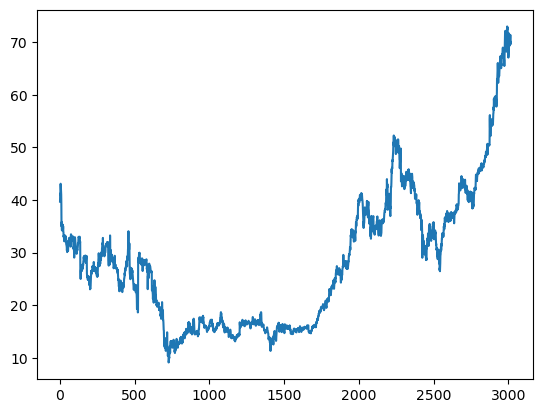

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['Open'])

## define X , y

In [ ]:
import numpy as np
X = data['Open'].values

In [ ]:
X[:16]

array([39.69, 41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  ,
       39.09, 35.01, 35.82, 34.44, 34.22, 34.55, 35.43])

In [ ]:
# [
#     [39.69, 41.22, 40.93] -> [42.88],
#     [41.22, 40.93, 42.88] -> [43.1],
#     [40.93, 42.88, 43.1] -> [42.96]
#     ...
# ]

## spliting

In [ ]:
X_train, X_test = X[:2500], X[2500:]

## Sequential

In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    SimpleRNN(units=64, activation='tanh'),
    Dense(1)
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='mean_absolute_error'
)

In [ ]:
X_train_n, y_train_n = [], []
for i in range(len(X_train) - 30):
    d = i + 30
    X_train_n.append(X_train[i:d])
    y_train_n.append(X_train[d])

In [ ]:
X_train_n.shape

In [ ]:
X_train_n[:2]

[array([39.69, 41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  ,
        39.09, 35.01, 35.82, 34.44, 34.22, 34.55, 35.43, 34.94, 35.26,
        35.06, 35.2 , 34.45, 35.01, 34.  , 33.9 , 33.01, 33.24, 33.01,
        32.58, 32.21, 32.14]),
 array([41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  , 39.09,
        35.01, 35.82, 34.44, 34.22, 34.55, 35.43, 34.94, 35.26, 35.06,
        35.2 , 34.45, 35.01, 34.  , 33.9 , 33.01, 33.24, 33.01, 32.58,
        32.21, 32.14, 32.62])]

In [ ]:
X_train_n[0]

array([39.69, 41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  ,
       39.09, 35.01, 35.82, 34.44, 34.22, 34.55, 35.43, 34.94, 35.26,
       35.06, 35.2 , 34.45, 35.01, 34.  , 33.9 , 33.01, 33.24, 33.01,
       32.58, 32.21, 32.14])

In [ ]:
y_train_n[0]

32.62

In [ ]:
X_test_n, y_test_n = [], []
for i in range(len(X_test) - 30):
    d = i + 30
    X_test_n.append(X_test[i:d])
    y_test_n.append(X_test[d])

In [ ]:
X_train_n = np.array(X_train_n)
X_test_n = np.array(X_test_n)

In [ ]:
X_train_n.shape

(2470, 30)

In [ ]:
X_train_n[:2]

array([[39.69, 41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  ,
        39.09, 35.01, 35.82, 34.44, 34.22, 34.55, 35.43, 34.94, 35.26,
        35.06, 35.2 , 34.45, 35.01, 34.  , 33.9 , 33.01, 33.24, 33.01,
        32.58, 32.21, 32.14],
       [41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  , 39.09,
        35.01, 35.82, 34.44, 34.22, 34.55, 35.43, 34.94, 35.26, 35.06,
        35.2 , 34.45, 35.01, 34.  , 33.9 , 33.01, 33.24, 33.01, 32.58,
        32.21, 32.14, 32.62]])

In [ ]:
X_train_n[0]

array([39.69, 41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  ,
       39.09, 35.01, 35.82, 34.44, 34.22, 34.55, 35.43, 34.94, 35.26,
       35.06, 35.2 , 34.45, 35.01, 34.  , 33.9 , 33.01, 33.24, 33.01,
       32.58, 32.21, 32.14])

In [ ]:
y_train_n[0]

32.62

In [ ]:
X_train_n = np.reshape(X_train_n, (X_train_n.shape[0], X_train_n.shape[1], 1))
X_test_n = np.reshape(X_test_n, (X_test_n.shape[0], X_test_n.shape[1], 1))

In [ ]:
X_train_n.shape

(2470, 30, 1)

In [ ]:
X_train_n[0]

In [ ]:
y_train_n

In [ ]:
y_train_n = np.array(y_train_n)
y_test_n = np.array(y_test_n)

In [ ]:
y_train_n

array([32.62, 33.3 , 32.88, ..., 34.34, 34.76, 34.24])

In [ ]:
r = model.fit(
    X_train_n, y_train_n,
    epochs=30,
    batch_size=20
)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 19.0238 
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.8902 
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.4166
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.2718
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1785 
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4822 
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1419
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0009
Epoch 9/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8628 
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7794
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6697 
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6432
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5753
Epoch 14/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5524 
Epoch 15/100
124/124 ━━━━━━━

121/121 [==============================] - 1s 12ms/step - loss: 0.4273
Epoch 99/100
121/121 [==============================] - 1s 12ms/step - loss: 0.4384
Epoch 100/100
121/121 [==============================] - 1s 12ms/step - loss: 0.4279


In [ ]:
model.evaluate(X_test_n, y_test_n)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3348  


3.9330930709838867

In [ ]:
X_train_n_Predicted = model.predict(X_train_n)
X_test_n_Predicted = model.predict(X_test_n)
XFinal = np.concatenate([X_train_n_Predicted, X_test_n_Predicted], axis=0)

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step   
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


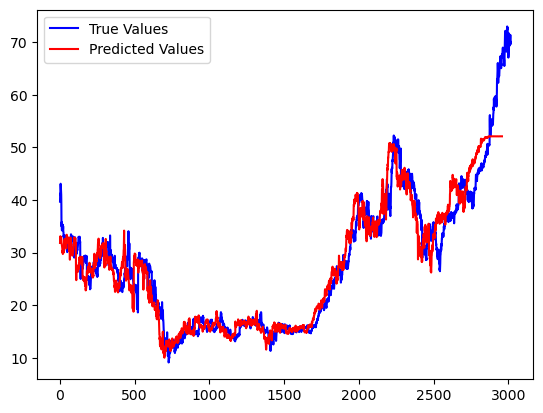

In [ ]:
plt.plot(X, color='blue', label='True Values')
plt.plot(XFinal, color='red', label='Predicted Values')
plt.legend()